<a href="https://colab.research.google.com/github/masthan1233/ProgrammingAssignment2/blob/master/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the Data

In [2]:
"""
importing the modules
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

"""
Reading the data in who_df
who_df_copy is the copy of the original Dataframe, we will make all our changes to who_df_copy

"""
who_df = pd.read_csv("Life Expectancy Data.csv")
who_df_copy = who_df

Checking out the Data


In [5]:
who_df.head(6)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [6]:
who_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
who_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
who_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Renaming Column names

In [9]:
# Function_name : rename_columns
# Usage : Renaming the columns removing whitespace and Upper case
# Arguments : new_df, original_df
# Returns : new_df with new column names

def rename_columns(new_df, original_df):
    columns = {}
    for col in original_df.columns:
        columns.update({col : col.strip().lower()})
        
    new_df.rename(columns=columns, inplace=True)
    print(new_df.columns)
    return new_df

rename_columns(who_df_copy, who_df)

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')


,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


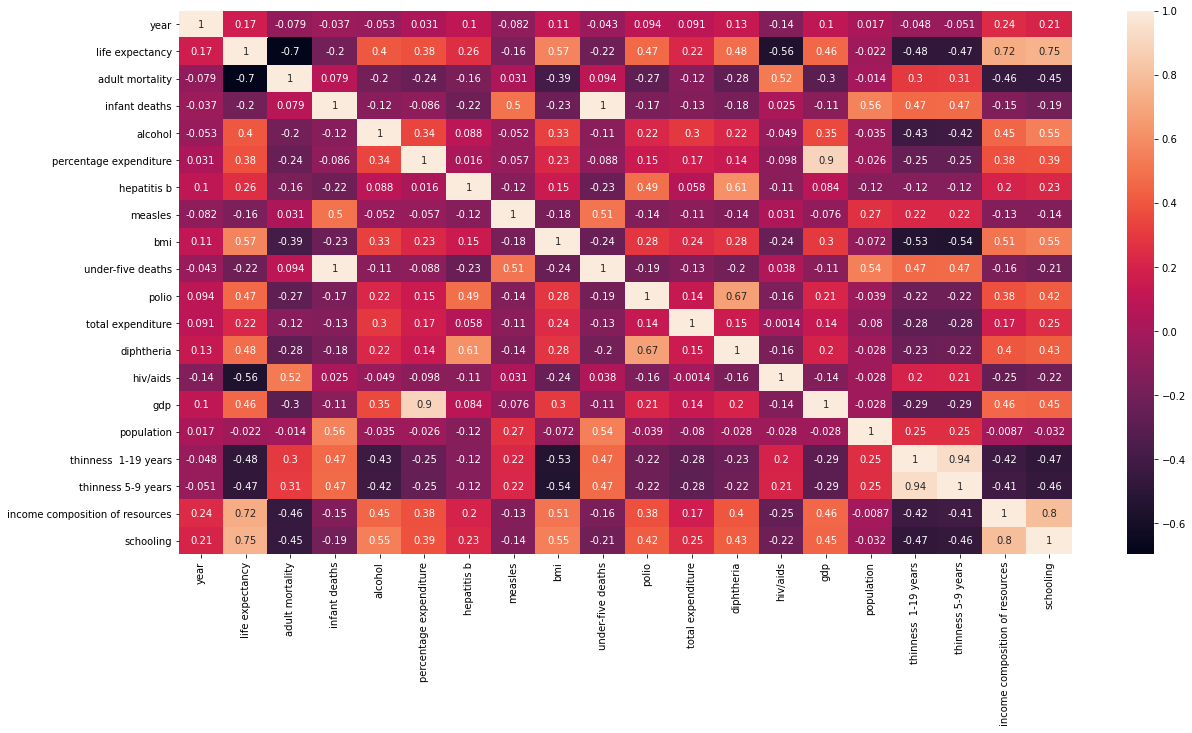

In [10]:
# Looking at the correlation factor for the data

plt.figure(figsize=(20,10))
sns.heatmap(who_df_copy.corr(), annot=True)

Working with Missing Data

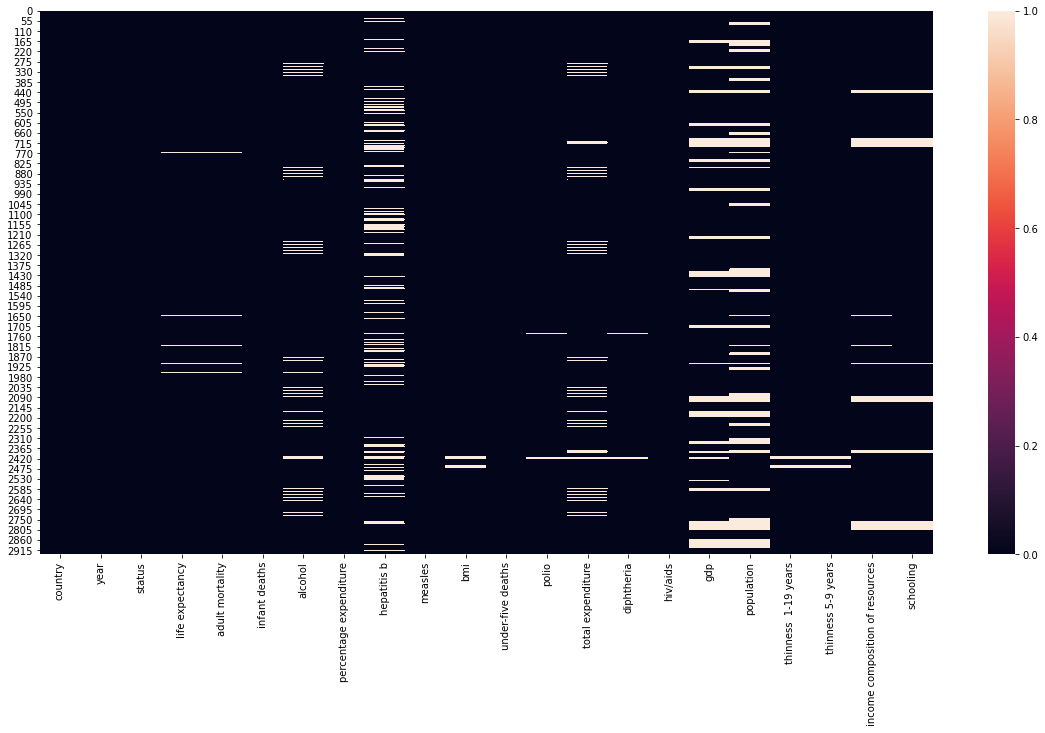

In [11]:
# Looking at the missing values of the data

plt.figure(figsize=(20,10))
sns.heatmap(who_df_copy.isnull())

In [12]:
# Function_name : calculate_missingdata_pct
# Usage : Calculates percentage of missing values for all features in a DataFrame
# Arguments : df
# Returns : missingdata

# Let's see the percentage of missing Data per feature
# df.isna().values.any() is a quick way to check if column has any null value
# We can append a df just like a list

def calculate_missingdata_pct(df):
    missingdata = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missingdata = missingdata.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missingdata
calculate_missingdata_pct(who_df_copy)

,category,percentage
0,life expectancy,0.340368
1,adult mortality,0.340368
2,alcohol,6.603131
3,hepatitis b,18.822328
4,bmi,1.157250
5,polio,0.646698
6,total expenditure,7.692308
7,diphtheria,0.646698
8,gdp,15.248468
9,population,22.191967


In [13]:
# Function_name : drop_columns
# Usage : drop_columns from a dataframe
# Arguments : df, drop_list, inplace_value
# Returns : df

"""
Useful link: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

We want to drop the features that are not required for the analysis
If high correlation is seen between 2 predictors, it means that both preds have similar effect on the response
So we can drop one of them!

corr(thinness 1-19 year,thinness 5-9 years) = 0.94
corr(infant deaths, under-five deaths) = 1
corr(percentage expenditure, gdp) = 0.9,  Will drop gdp as it has large % of missing values
corr(income composition of resorces, schooling) = 0.84
corr(diptheria, hepatitis b)=0.6

Dropping columns/features having high correlation value and/or high missing values
Dropping rows having very less (less than 2%) missing values

"""
def drop_columns(df, drop_list, inplace_value=False):
    for feature in drop_list:
        if feature in df.columns:
            df.drop(feature, axis=1, inplace=inplace_value)
    return df

drop_features = ['thinness 5-9 years', 'under-five deaths','gdp','schooling','hepatitis b','population']

who_df_copy = drop_columns(who_df_copy, drop_features, inplace_value=True)

In [14]:
who_df_copy.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'measles', 'bmi',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids',
       'thinness  1-19 years', 'income composition of resources'],
      dtype='object')

In [15]:
# Function_name : drop_rows
# Usage : dropping rows if the feature has very less missing value (<threshold)
#
# Arguments : df, missingdata_df, threshold, inplace_value
# missingdata_df is a df with features (category, percentage)
# threshold is float
#
# Returns : df

# Dropping the rows with missing values where feature has less than threshold missing value

def drop_rows(df, missingdata_df, threshold=2, inplace_value=False):
    drop_rows = []
    for ind in missingdata_df.index: 
        if missingdata_df['category'][ind] in df.columns:
            if missingdata_df['percentage'][ind] < threshold:
                drop_rows.append(missingdata_df['category'][ind])

    print("Drop rows :",drop_rows)
    df.dropna(subset=drop_rows, inplace=inplace_value)
    return df

missingdata = calculate_missingdata_pct(who_df_copy)
missingdata

who_df_copy = drop_rows(who_df_copy, missingdata, threshold=2, inplace_value=True)

Drop rows : ['life expectancy', 'adult mortality', 'bmi', 'polio', 'diphtheria', 'thinness  1-19 years']


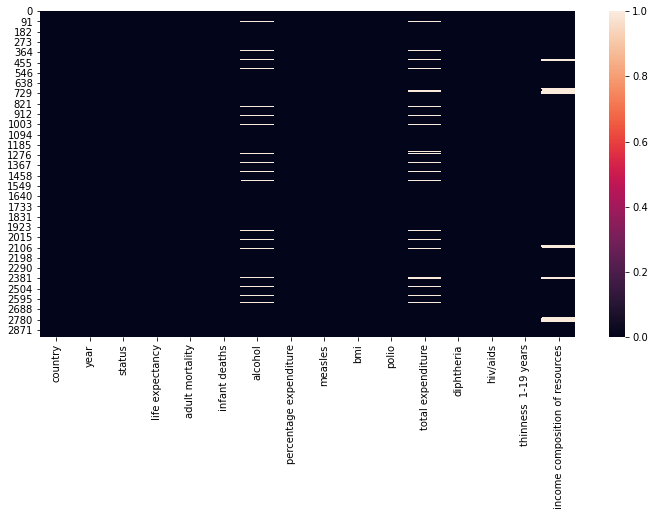

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(who_df_copy.isnull())

In [17]:
# Rest of the missing values we will fill up using correlation and impute function
# Here is country-wise mean of all features

countrywise_mean = who_df_copy.groupby("country").mean()
countrywise_mean

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,income composition of resources
country,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,2362.2500,15.51875,48.3750,8.252500,52.3125,0.10000,16.58125,0.415375
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,53.3750,49.06875,98.1250,5.945625,98.0625,0.10000,1.61875,0.709875
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,1943.8750,48.74375,91.7500,4.604000,91.8750,0.10000,6.09375,0.694875
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,3561.3125,18.01875,46.1250,3.919333,47.6875,2.36875,6.19375,0.458375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,0.0000,38.42500,96.9375,4.791333,98.3125,0.12500,3.42500,0.488625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.420000,0.000000,165.0000,54.48750,74.6875,4.998667,68.5000,0.10000,1.65000,0.726812
Viet Nam,2007.5,74.77500,126.5625,29.1875,3.087333,0.000000,4232.9375,11.18750,94.9375,5.977333,91.7500,0.14375,14.92500,0.627063
Yemen,2007.5,63.86250,211.8125,39.3750,0.047333,0.000000,2761.1875,33.48750,67.1250,5.005333,72.6250,0.10000,13.83125,0.475500


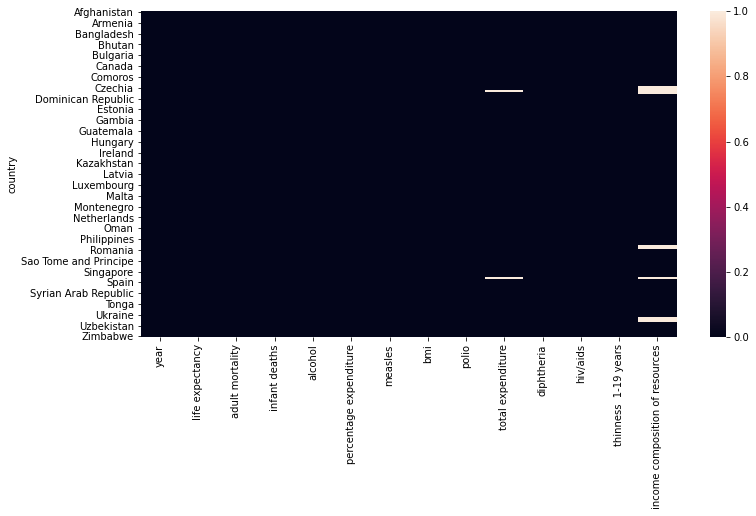

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(countrywise_mean.isnull())

In [19]:
# Function_name : impute_feature
# Usage : Imputing missing values with country wise mean
# Arguments : country_feature series
# Returns : feature value

def impute_feature(country_feature):
    country = country_feature[0] 
    feature = country_feature[1]
    
    # country_feature[0] is the country name, for eg. US
    # country_feature.keys()[0] is the column name, for eg. income
    
    if pd.isnull(feature):
        if not pd.isnull(countrywise_mean[country_feature.keys()[1]][country]):
            return countrywise_mean[country_feature.keys()[1]][country]
    else:
        return feature
    
features = ['alcohol', 'total expenditure', 'income composition of resources']
for feature in features: 
    who_df_copy[feature] = who_df_copy[['country', feature]].apply(impute_feature, axis=1)
    print(feature, who_df_copy[feature].isna().values.any())

alcohol False
total expenditure True
income composition of resources True


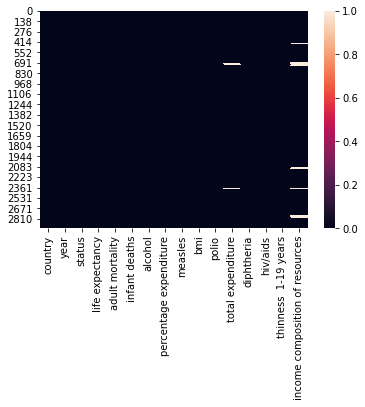

In [20]:
sns.heatmap(who_df_copy.isna())

In [21]:
who_df_copy['total expenditure'].isna().sum()

32

In [22]:
who_df_copy['income composition of resources'].isna().sum()

160

In [23]:
who_df_copy.isna().sum()

country                              0
year                                 0
status                               0
life expectancy                      0
adult mortality                      0
infant deaths                        0
alcohol                              0
percentage expenditure               0
measles                              0
bmi                                  0
polio                                0
total expenditure                   32
diphtheria                           0
hiv/aids                             0
thinness  1-19 years                 0
income composition of resources    160
dtype: int64

In [24]:
who_df_copy.shape

(2888, 16)

In [25]:
#   Imputing missing values with SimpleImputer
#   SimpleImputer takes 2-D numpy array
#   array.shape[0] = no. of rows
#   array.shape[1] = no. of cols, this gives error for 1-D array
#   [Impotant] : the mean/median (strategy of Simple) is calculated over columns
#   So we should arrange the data in [1 row]X[n col] array

from sklearn.impute import SimpleImputer

print("For who_df_copy['total expenditure']")

X_arr = np.array(who_df_copy.iloc[:,11].values)
print(X_arr.shape)
# Making 2-D array
X_arr = X_arr.reshape(who_df_copy.shape[0],1) 
print(X_arr.shape)
# Checking Null Values
print(np.isnan(X_arr).sum())  
# Using SimpleImputer for missing values
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
X_arr = SI.fit_transform(X_arr) 
#Checking Null Values
print(X_arr.shape)
print(np.isnan(X_arr).sum()) 

who_df_copy['total expenditure'] = X_arr
print(who_df_copy['total expenditure'].isna().values.any())

print("For who_df_copy['income composition of resources']")

X_arr = np.array(who_df_copy.iloc[:,15].values)
print(X_arr.shape)
X_arr = X_arr.reshape(who_df_copy.shape[0],1)
print(X_arr.shape)
print(np.isnan(X_arr).sum())
SI = SimpleImputer(missing_values=np.nan, strategy='mean')
X_arr = SI.fit_transform(X_arr)
print(X_arr.shape)
print(np.isnan(X_arr).sum())

who_df_copy['income composition of resources'] = X_arr
print(who_df_copy['income composition of resources'].isna().values.any())

For who_df_copy['total expenditure']
(2888,)
(2888, 1)
32
(2888, 1)
0
False
For who_df_copy['income composition of resources']
(2888,)
(2888, 1)
160
(2888, 1)
0
False


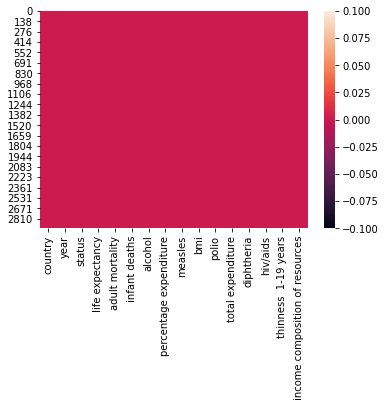

In [26]:
sns.heatmap(who_df_copy.isnull())


Data Visualization

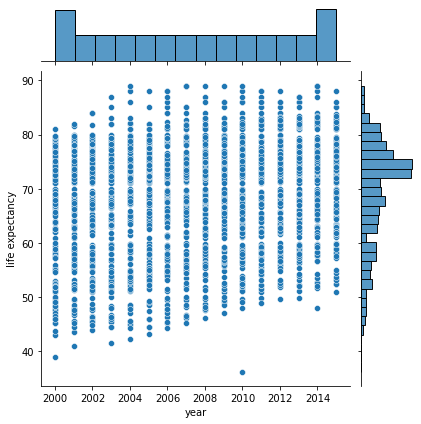

In [27]:
"""
Observation
===========

Every year has Life Expectancy ranging between 40-85 years as there about 180 developing and developed countries

"""
sns.jointplot(x='year',y='life expectancy',data=who_df_copy, kind='scatter')

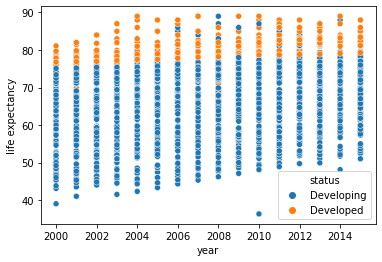

In [28]:
"""
Observation
===========
Developed countries have higher life expectancy than developing countries- which totally makes sense!

"""

sns.scatterplot(x='year',y='life expectancy',data=who_df_copy, hue='status')

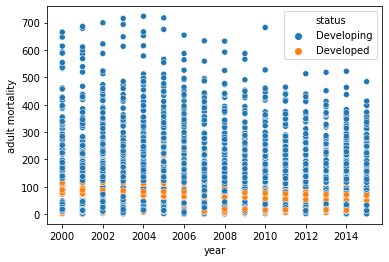

In [29]:
"""
Observation
===========
Developed countries have lower adult mortality than developing countries
- which supports the higher life expectancy count in the former.

"""

sns.scatterplot(x='year',y='adult mortality',data=who_df_copy, hue='status')

In [30]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [31]:
"""
Observation
===========
We can't see any clear relationship between total expenditure and life expectancy

"""


who_df_copy.iplot(kind='scatter',x='total expenditure',y='life expectancy',mode='markers',size=10)

In [32]:
"""
Observation
===========
We can't see any clear relationship between total expenditure and adult mortality

"""
who_df_copy.iplot(kind='scatter',x='total expenditure',y='adult mortality',mode='markers',size=10)

In [33]:
"""
Observation
===========
Adult mortality has an inverse relationship with life expectancy.

"""

who_df_copy.iplot(kind='scatter',x='adult mortality',y='life expectancy',mode='markers',size=10)

In [34]:
"""
Observation
===========
Usually the peak countries are developed ones in this.

"""
who_df_copy.iplot(kind='bar',x='country',y='life expectancy')

In [35]:
who_df_copy.iplot(kind='bar',x='country',y='adult mortality')

In [36]:
who_df_copy.iplot(kind='bar',x='country',y='alcohol')

In [37]:
who_df_copy.iplot(kind='scatter',x='country',y='alcohol')

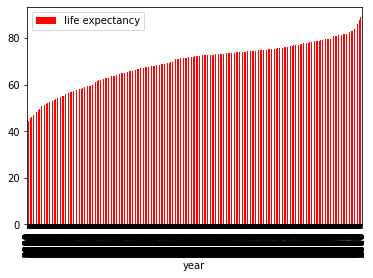

In [38]:
who_df_copy.sort_values('life expectancy').plot(kind='bar',y='life expectancy',x='year',color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



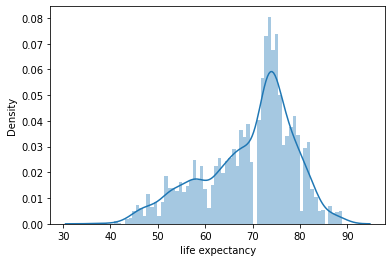

In [39]:
"""
Observation
===========
Peak value of life expectancy is arounf 72 years.

"""
sns.distplot(who_df_copy['life expectancy'], bins=70)

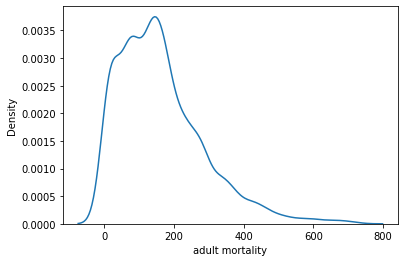

In [40]:
"""
Observation
===========
Adult mortality has most frequent value of 200

"""
sns.kdeplot(who_df_copy['adult mortality'])

In [41]:
Italy_df = who_df_copy.iloc[1280:1296,:]
Italy_df

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,income composition of resources
1282,Italy,2015,Developed,82.7,56.0,1,8.266667,0.000000,159,63.6,93.0,8.777333,93.0,0.1,0.6,0.881
1283,Italy,2014,Developed,82.5,57.0,2,7.560000,4831.644796,0,63.1,95.0,9.250000,95.0,0.1,0.6,0.877
1284,Italy,2013,Developed,82.3,58.0,2,7.350000,483.191684,0,62.6,96.0,9.220000,96.0,0.1,0.5,0.876
1285,Italy,2012,Developed,82.0,6.0,2,7.490000,4793.904924,376,62.1,96.0,9.280000,97.0,0.1,0.5,0.877
1286,Italy,2011,Developed,82.0,6.0,2,6.980000,5439.691769,5189,61.5,96.0,9.270000,96.0,0.1,0.5,0.872
1287,Italy,2010,Developed,81.8,6.0,2,6.950000,5219.668802,372,61.0,96.0,9.420000,96.0,0.1,0.5,0.869
1288,Italy,2009,Developed,81.6,61.0,2,7.250000,5243.316638,351,6.5,96.0,9.410000,96.0,0.1,0.5,0.868
1289,Italy,2008,Developed,81.5,61.0,2,7.960000,66.378405,1617,59.9,96.0,8.890000,96.0,0.1,0.5,0.866
1290,Italy,2007,Developed,81.3,63.0,2,8.370000,5228.821581,321,59.4,97.0,8.480000,97.0,0.1,0.5,0.862
1291,Italy,2006,Developed,81.2,65.0,2,8.440000,473.191545,439,58.8,97.0,8.820000,96.0,0.1,0.5,0.856


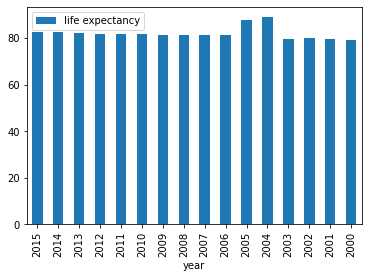

In [42]:
"""
Observation
===========
There is very slow upwards rise in life expectancy of Italy over the years.
2004 and 2005 are the best years.

"""

Italy_df.plot(kind='bar',y='life expectancy',x='year')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



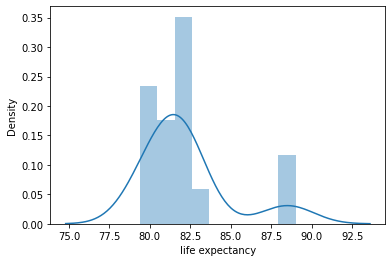

In [43]:
"""
Observation
===========
Life expectancy of Italy has it's peak at 82 years!

"""

sns.distplot(Italy_df['life expectancy'])

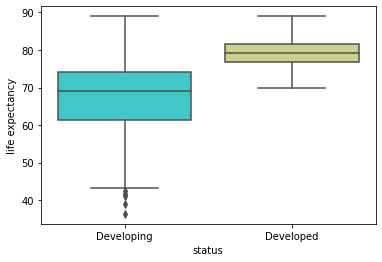

In [44]:
sns.boxplot(x="status", y="life expectancy", data=who_df_copy,palette='rainbow')

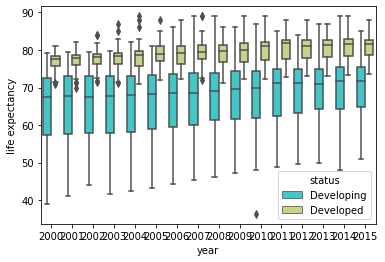

In [45]:
sns.boxplot(x="year", y="life expectancy", data=who_df_copy,palette='rainbow', hue='status')

Training Linear Regression Model

In [47]:
X = who_df_copy[['adult mortality','infant deaths', 'alcohol', 'percentage expenditure', 'measles', 'bmi', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids',
       'thinness  1-19 years', 'income composition of resources']]
y = who_df_copy['life expectancy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [48]:
# This is the Beta-zero in the linear function of X and y.
# This is the value of y/response (life expectancy) when all the predictors are zero
# print the intercept
print(lm.intercept_)

55.182677922334534


In [49]:
# Coefficient is the constant rate that y(response) is going to change
# with a unit change in X(predictor)
#
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
adult mortality,-0.021733
infant deaths,-0.000501
alcohol,0.161462
percentage expenditure,0.000432
measles,-0.000038
bmi,0.055516
polio,0.035061
total expenditure,0.085893
diphtheria,0.051869
hiv/aids,-0.458406


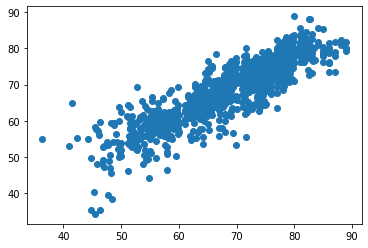

In [50]:
# Looks like the prediction is pretty similar to y_test

predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



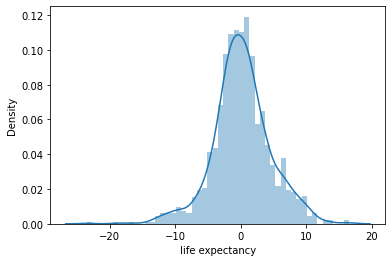

In [51]:
sns.distplot((y_test-predictions),bins=50);

In [52]:
# Life expectancy that is varying from about 40 years to 85 years
# This model's prediction of life expectancy can be off by 3 years on average

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.2845674201226887
MSE: 19.70890228750218
RMSE: 4.439470946802353



Highlight of the observations on WHO Life expectancy Data

In [53]:
# Which country has the best life expectancy based on this data?

print("The country that highest life expectancy is :", who_df_copy['country'][who_df_copy['life expectancy'].idxmax()])
who_df_copy.iloc[who_df_copy['life expectancy'].idxmax(),:]

The country that highest life expectancy is : Belgium


country                              Belgium
year                                    2014
status                             Developed
life expectancy                           89
adult mortality                           76
infant deaths                              0
alcohol                                 12.6
percentage expenditure               7163.35
measles                                   70
bmi                                     63.4
polio                                     99
total expenditure                       1.59
diphtheria                                99
hiv/aids                                 0.1
thinness  1-19 years                       1
income composition of resources         0.89
Name: 241, dtype: object

In [54]:
# Which country has the worst life expectancy based on this data?

print("The country that worst life expectancy is :", who_df_copy['country'][who_df_copy['life expectancy'].idxmin()])
who_df_copy.iloc[who_df_copy['life expectancy'].idxmin(),:]

The country that worst life expectancy is : Haiti


country                                 Haiti
year                                     2008
status                             Developing
life expectancy                          62.1
adult mortality                           259
infant deaths                              16
alcohol                                  5.95
percentage expenditure                 63.832
measles                                     0
bmi                                      41.8
polio                                      64
total expenditure                        5.92
diphtheria                                 63
hiv/aids                                  2.4
thinness  1-19 years                      4.2
income composition of resources         0.462
Name: 1129, dtype: object

In [59]:
yearwise_mean = who_df_copy.groupby("year").mean()
countrywise_mean = who_df_copy.groupby("country").mean()

In [60]:
# Which country has the best average life expectancy based on this data?
print(countrywise_mean['life expectancy'].idxmax())
countrywise_mean.loc[countrywise_mean['life expectancy'].idxmax()]

Japan


year                               2007.500000
life expectancy                      82.537500
adult mortality                      57.125000
infant deaths                         2.875000
alcohol                               7.040667
percentage expenditure             3923.050329
measles                            6875.812500
bmi                                  25.606250
polio                                96.000000
total expenditure                     6.472667
diphtheria                           96.250000
hiv/aids                              0.100000
thinness  1-19 years                  1.812500
income composition of resources       0.876562
Name: Japan, dtype: float64

In [61]:
# Which country has the lowest average life expectancy based on this data?
print(countrywise_mean['life expectancy'].idxmin())
countrywise_mean.loc[countrywise_mean['life expectancy'].idxmin()]

Sierra Leone


year                               2007.500000
life expectancy                      46.112500
adult mortality                     357.812500
infant deaths                        27.562500
alcohol                               3.154667
percentage expenditure               29.105579
measles                             673.875000
bmi                                  18.306250
polio                                71.750000
total expenditure                     9.218000
diphtheria                           72.125000
hiv/aids                              1.518750
thinness  1-19 years                  7.681250
income composition of resources       0.361812
Name: Sierra Leone, dtype: float64

In [62]:
print("Highest Life expectancy is in the year :",yearwise_mean['life expectancy'].idxmax())
print("Lowest expectancy is in the year :",yearwise_mean['life expectancy'].idxmin())

Highest Life expectancy is in the year : 2015
Lowest expectancy is in the year : 2000


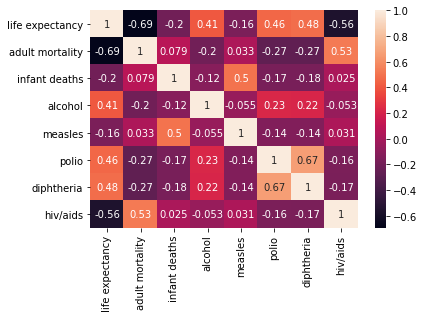

In [63]:
# life expectancy have a poitive correlation with alcohol, polio and diptheria! Strange!
# Infant death has high correlation with measles
# Adult mortality has high correlation with HIV/AIDS

disease_df = who_df_copy[['life expectancy', 'adult mortality','infant deaths', 'alcohol', 'measles', 'polio','diphtheria', 'hiv/aids']]
sns.heatmap(disease_df.corr(), annot=True)

In [64]:
# Which country has the highest cases of HIV/AIDS based on this data?
print(countrywise_mean['hiv/aids'].idxmax())
countrywise_mean.loc[countrywise_mean['hiv/aids'].idxmax()]

Swaziland


year                               2007.500000
life expectancy                      51.325000
adult mortality                     339.000000
infant deaths                         2.625000
alcohol                               4.463333
percentage expenditure              278.099713
measles                              49.125000
bmi                                  25.500000
polio                                89.000000
total expenditure                     7.308667
diphtheria                           83.750000
hiv/aids                             32.943750
thinness  1-19 years                  6.475000
income composition of resources       0.515688
Name: Swaziland, dtype: float64

In [65]:
# Which country has the highest cases of infant deaths based on this data?
print(countrywise_mean['infant deaths'].idxmax())
countrywise_mean.loc[countrywise_mean['infant deaths'].idxmax()]

India


year                                2007.500000
life expectancy                       65.418750
adult mortality                      146.562500
infant deaths                       1366.687500
alcohol                                1.942000
percentage expenditure                33.242621
measles                            46454.187500
bmi                                   14.793750
polio                                 69.625000
total expenditure                      4.358667
diphtheria                            67.062500
hiv/aids                               0.256250
thinness  1-19 years                  27.100000
income composition of resources        0.549500
Name: India, dtype: float64

In [66]:
"""
Q: Does GDP effect life expectancy?
A: GDP and percentage both have strong positive correlation with life expectancy


Q: Does Schooling effect life expectancy?
A: Yes, positively


Q: Is the correlation between the predictors?
A: Yes.

"""

'\nQ: Does GDP effect life expectancy?\nA: GDP and percentage both have strong positive correlation with life expectancy\n\n\nQ: Does Schooling effect life expectancy?\nA: Yes, positively\n\n\nQ: Is the correlation between the predictors?\nA: Yes.\n\n'